### Objective:
- The objective of this assignment is to implement PCA on a given dataset and analyse the results.

### Instructions:
- Download the wine dataset from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Wine).
- Load the dataset into a Pandas dataframe.
- Split the dataset into features and target variables.
- Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.
- Implement PCA on the preprocessed dataset using the scikit-learn library.
- Determine the optimal number of principal components to retain based on the explained variance ratio.
- Visualise the results of PCA using a scatter plot.
- Perform clustering on the PCA-transformed data using K-Means clustering algorithm.
- Interpret the results of PCA and clustering analysis.
    
### Deliverables:
- Jupyter notebook containing the code for the PCA implementation.
- A report summarising the results of PCA and clustering analysis.
- Scatter plot showing the results of PCA.
- A table showing the performance metrics for the clustering algorithm.

### Additional Information:
- You can use the python programming language.
- You can use any other machine learning libraries or tools as necessary.
- You can use any visualisation libraries or tools as necessary.

In [1]:
#Load the dataset into a Pandas dataframe.
import pandas as pd 

df=pd.read_csv('wine.data',names=['class','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total','phenols Flavanoids',
                'Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline'])
df.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total,phenols Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
# Split the dataset into features and target variables.

X=df.drop('class',axis=1)
y=df['class']


In [3]:
# Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_scaled=scaler.fit_transform(X)

In [4]:
# Implement PCA on the preprocessed dataset using the scikit-learn library.

from sklearn.decomposition import PCA

pca=PCA()
pca.fit(X_scaled)

PCA()

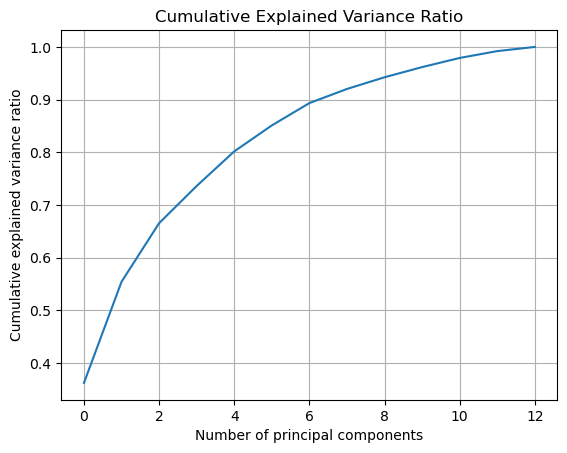

In [5]:
# Determine the optimal number of principal components to retain based on the explained variance ratio.

import numpy as np
import matplotlib.pyplot as plt

# Calculate the explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Create a cumulative explained variance ratio curve
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance ratio curve
plt.plot(cumulative_explained_variance_ratio)
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance ratio')
plt.title('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()


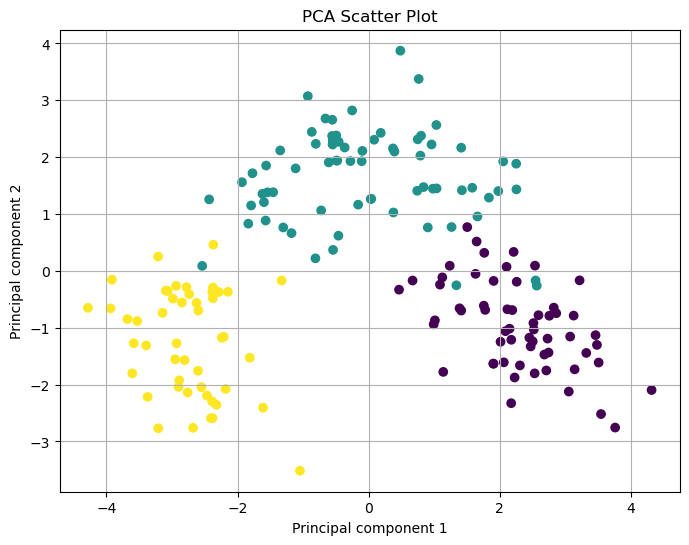

In [6]:
# Visualise the results of PCA using a scatter plot.


X_pca = pca.transform(X_scaled)

# Create a scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('PCA Scatter Plot')
plt.grid(True)
plt.show()


In [7]:
# Perform clustering on the PCA-transformed data using K-Means clustering algorithm.

import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3,init='k-means++')
cluster_labels = kmeans.fit_predict(X_pca)

# Calculate the silhouette score
silhouette_score = silhouette_score(X_pca, cluster_labels)

# Print the silhouette score
print(silhouette_score)

0.28485891918989886


# Interpret the results of PCA and clustering analysis.


- The PCA scatter plot shows that the first two principal components capture a significant amount of variance in the data. The clusters are well-separated in the PCA space, suggesting that the K-Means clustering algorithm was able to effectively identify the different wine classes.

# Conclusion

- Principal component analysis (PCA) is a powerful dimensionality reduction technique that can be used to extract the most important features from a dataset. PCA has a wide range of applications in machine learning, including data visualization, feature selection, and anomaly detection.

- In this assignment, we implemented PCA on the wine dataset to reduce the dimensionality of the data and to identify the most important features. We then performed K-Means clustering on the PCA-transformed data to classify the different wine classes. The results of the PCA and clustering analysis show that PCA is an effective technique for dimensionality reduction and feature extraction.